In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [79]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


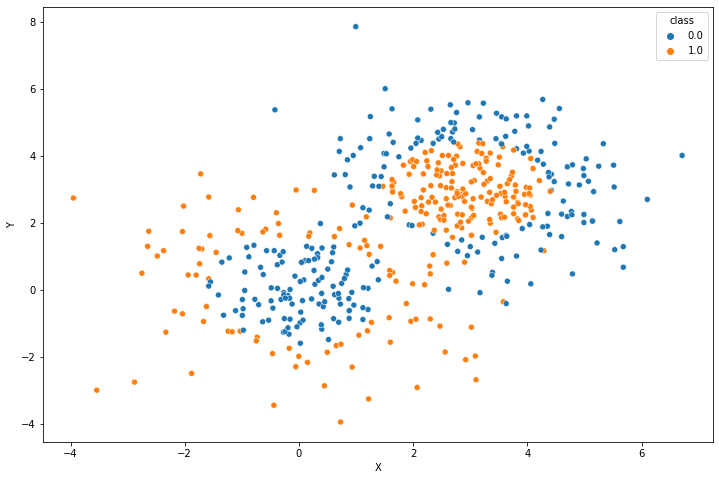

In [80]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score

splitter = KFold(n_splits=5, shuffle=True, random_state=33)

X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')
### Your code is here
model = LogisticRegression()
# cv_result_pipe = cross_validate(model, X, y, scoring='accuracy',
#                                 cv=splitter, return_train_score=True)


# print(f"Accuracy на трейне: {np.mean(cv_result_pipe['train_score']).round(3)}")
# print(f"Accuracy на тесте: {np.mean(cv_result_pipe['test_score']).round(3)}")

In [82]:
model.fit(X, y)
logreg_preds = model.predict(X)
accuracy_score(y, logreg_preds)

0.424

In [83]:
h = .02

In [84]:
    # Расчет пределов графика
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

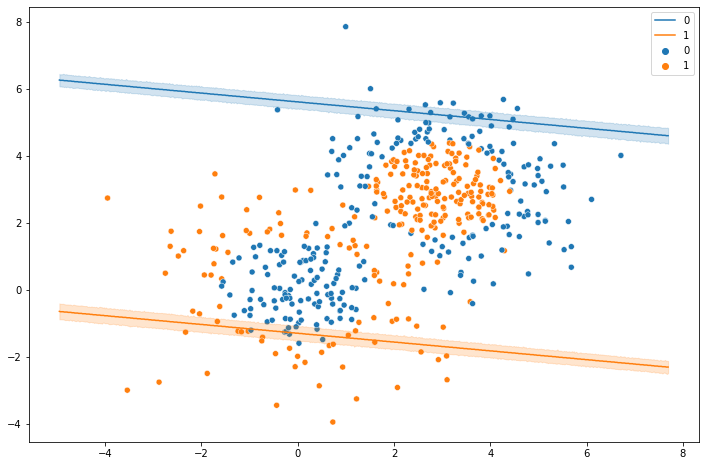

In [85]:
sns.scatterplot(X[:,0], X[:,1], data=X, hue=y);
sns.lineplot(x=xx.ravel(), y=yy.ravel(), hue=Z.ravel(), color='#FF5533');


In [90]:
model.coef_[0],  model.intercept_

(array([-0.00316169, -0.01204832]), array([0.0284847]))

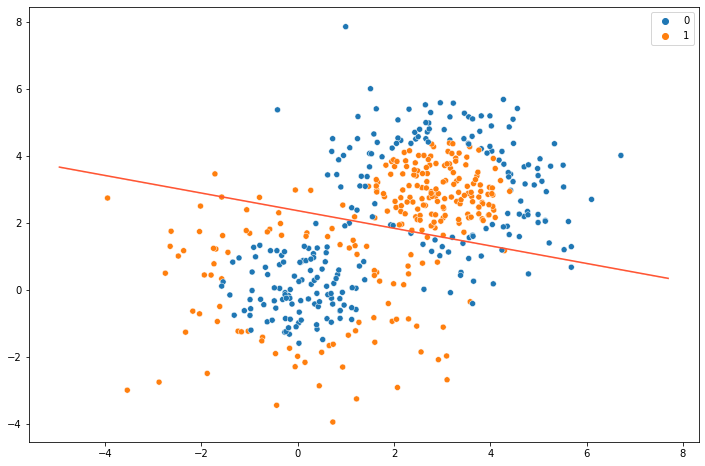

In [95]:
betas = model.coef_[0]
bias = model.intercept_
sns.scatterplot(X[:,0], X[:,1], data=X, hue=y);
sns.lineplot(x=xx.ravel(), y=(- betas[0] * xx.ravel() - bias) / betas[1] , color='#FF5533');

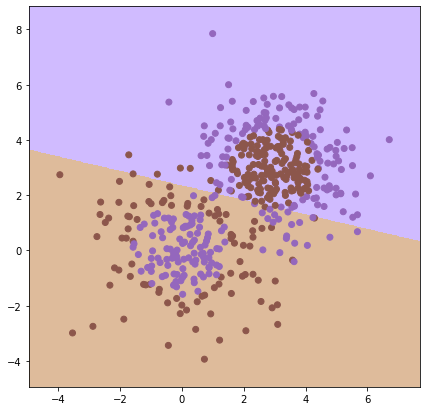

In [50]:
#sns.scatterplot(X[:,0], X[:,1], data=X, hue=y);
cmap = ListedColormap(sns.color_palette(as_cmap=True)[4:6])
cmap_light = ListedColormap(sns.color_palette("pastel", as_cmap=True)[4:6])

    # Построим график
Z = np.array(Z).reshape(xx.shape);
plt.figure(figsize=(7,7));
plt.pcolormesh(xx, yy, Z, cmap=cmap_light);
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [51]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

all_k = [1, 3, 10, 30, 40, 60]
all_clfs = []
### Your code is here
for K in all_k:

    knn = KNeighborsClassifier(n_neighbors=K) 
    knn.fit(X_train, y_train)
    all_clfs.append(knn)
    preds_train = knn.predict(X_train)
    preds_test = knn.predict(X_test)
    print(K, accuracy_score(y_train, preds_train), accuracy_score(y_test, preds_test))
    


1 1.0 0.89
3 0.9475 0.87
10 0.915 0.85
30 0.8525 0.74
40 0.8 0.75
60 0.6925 0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [54]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

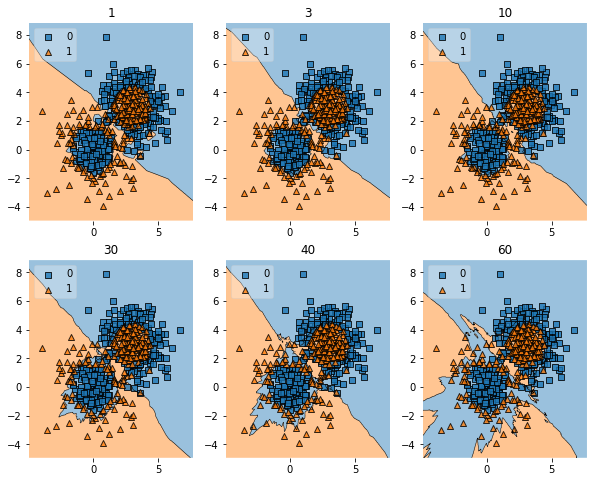

In [55]:
### Your code is here
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

#labels = ['Logistic Regression', 'K Neighbors Classifier']
for clf, lab, grd in zip(all_clfs,
                         all_k,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()



1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [56]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [58]:
### Your code is here

all_k = [1, 5, 10]

### Your code is here
for K in all_k:

    knn = KNeighborsClassifier(n_neighbors=K) 
    knn.fit(X_train, y_train)
    preds_test = knn.predict(X_test)
    print(K,  accuracy_score(y_test, preds_test))
    




1 0.43819542019519236
5 0.44317016671097104
10 0.4703603843086621


In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

for K in all_k:    
    pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(n_neighbors=K))])
    pipe.fit(X_train, y_train)
    preds_test = pipe.predict(X_test)
    print(K,  accuracy_score(y_test, preds_test))


1 0.5648805681084571
5 0.6303877264269168
10 0.6607678578209851


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [60]:
### Your code is here

pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(n_neighbors=10, p=1 ))])
pipe.fit(X_train, y_train)
preds_test = pipe.predict(X_test)
print(accuracy_score(y_test, preds_test))



0.6611476094634109


**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [61]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


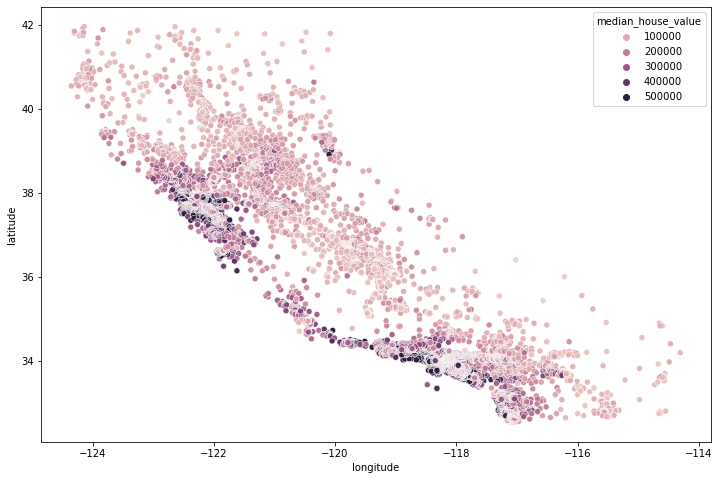

In [62]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [63]:
### Your code is here
from sklearn.linear_model import LinearRegression
splitter = KFold(n_splits=5, shuffle=True, random_state=33)

linear = LinearRegression()

linear_cv = cross_validate(linear, X_train, y_train, 
                           cv=splitter, scoring='neg_mean_squared_error',
                           return_train_score=True)

print(f"Среднее MSE линейной модели на трейне: {-np.mean(linear_cv['train_score']).round(3)}")
print(f"Среднее MSE линейной модели на тесте: {-np.mean(linear_cv['test_score']).round(3)}")

Среднее MSE линейной модели на трейне: 10190244401.805
Среднее MSE линейной модели на тесте: 10193599535.64


In [64]:
from sklearn.metrics import mean_squared_error
all_k = [i for i in range(1,10)]
for K in all_k:    
    pipe = Pipeline([('scaler', StandardScaler()), 
                 ('KNN', KNeighborsClassifier(n_neighbors=K))])
    pipe.fit(X_train, y_train)
    preds_test = pipe.predict(X_test)
    print(K,  mean_squared_error(y_test, preds_test))

1 4073025196.4011626
2 4059498579.5855136
3 4772073629.246124
4 5503457167.475775
5 5888256002.215601
6 6343521880.514535
7 6685787295.049176
8 7009007345.490552
9 7402653560.757995


In [65]:
from sklearn.neighbors import KNeighborsRegressor
h_range= 𝑛𝑝.𝑎𝑟𝑎𝑛𝑔𝑒(0.02,0.1,0.01)
mse = {}
for h in h_range:
    
    def kernel(distances, h=h):
    
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1/2) * ((distances)**2) / h**2
    
        return const * np.exp(power)

    knn = KNeighborsRegressor(n_neighbors=2, weights=kernel)
    knn.fit(X_train, y_train)
    
    preds_test = knn.predict(X_test)
    score = mean_squared_error(y_test, preds_test)
    mse[h] = score

print(mse)
    

{0.02: 3047638358.339993, 0.03: 3032406921.7628317, 0.039999999999999994: 3023251650.3027353, 0.049999999999999996: 3017903842.8589454, 0.06: 3014781298.5727463, 0.06999999999999999: 3012884385.5726194, 0.07999999999999999: 3011638890.823486, 0.09: 3010745650.1774664}


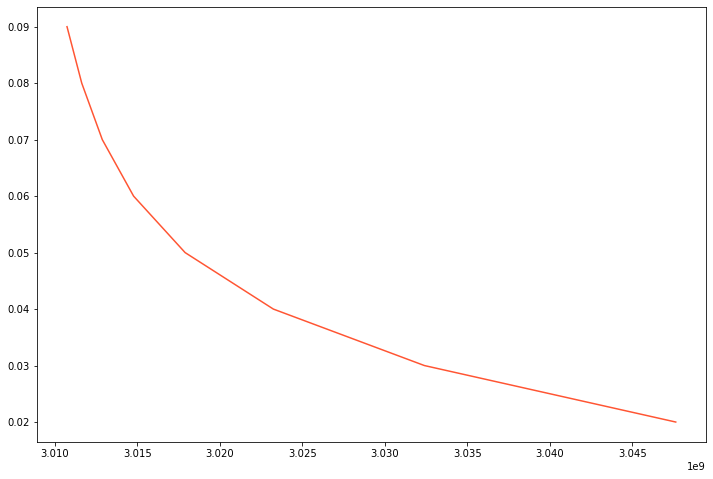

In [66]:
sns.lineplot(x=mse.values(), y=mse.keys(), color='#FF5533');